<b><p style="text-align:center;"> PROJET FRAGRAI </p></b>

<b><p style="color:blue;font-size:50px;">Importation </p></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from collections import Counter
import difflib

In [2]:
#help(matplotlib)
#help(pd)
#help(sns)
#help(np)

In [3]:
#Liste all the hyperparam,param
#list(matplotlib.colors.cnames.keys())
#0list(matplotlib.bins.cnames.keys())


<b><p style="color:blue;font-size:50px;">Load Data </p></b>

In [4]:
#Transform excel to csv
read_file = pd.read_excel (r'DataScrap/dataset.xlsx')
read_file.to_csv (r'dataset.csv', index = None, header=True)

#
df=pd.read_csv("dataset.csv", sep=",")


In [5]:
len("CI 14700 – CI 19140 – CI 17200 (BROWN 1 REPLACEMENT")

51

<b><p style="color:blue;size=600">Data Cleaning </p></b>

<b><p style="color:green;">Etape 1 : On a crée une liste poubelle qui regroupe tout les éléments qui ne sont pas des ingrédients et regroupé les éléments qui se ressemble ("water" et "aqua") ("Parfum" et "Fragrance") puis on a crée la liste avec le nombre d'occurence </p></b>


In [6]:

liste_corve=[" CETTE LISTE D'INGR&EACUTE"," JOUR"," 1)"," AVANT D’"," 10)"," FD&"," 40)"," 5)","DIENTS ENTRANT DANS LA COMPOSITION DES PRODUITS DE NOTRE MARQUE SONT R&EACUTE"," AVANT D'UTILISER UN PRODUIT DE NOTRE MARQUE"," VOTRE UTILISATION PERSONNELLE","DA L’ORÉAL REGELMÄßIG NEUE WISSENSCHAFTLICHE ERKENNTNISSE IN DIE PRODUKTFORMULIERUNG EINFLIEßEN LÄSST"," KÖNNEN VON EINER REFERENZ VERSCHIEDENE VERSIONEN MIT UNTERSCHIEDLICHEN ZUSAMMENSETZUNGEN IM UMLAUF SEIN","TES INVIT&EACUTE"," PARFUM"," SIE GELTEN STETS NUR FÜR DAS JEWEILS BEZEICHNETE PRODUKT MIT DER DAZU ANGEGEBENEN PRODUKT-REFERENZNUMMER"," PARFUM (FRAGRANCE) AQUA (WATER) BENZYL SALICYLATE LINALOOL HEXYL CINNAMAL HYDROXYCITRONELLAL ALPHA-ISOMETHYL IONONE CITRONELLOL LIMONENE GERANIOL EUGENOL BENZYL BENZOATE BENZYL ALCOHOL CITRAL","DIENTS FIGURANT SUR SON EMBALLAGE AFIN DE VOUS ASSURER QUE LES INGR&EACUTE"," LIRE LA LISTE D'INGR&EACUTE"]
def Ccleaner(string):
    """ 
    Fonction pour clean les mauvais ingrédients
    """
    if ("AQUA" in string) or ("WATER" in string )or ("EAU" in string):
        return "WATER"
    if "PARFUM" in string or "FRAGRANCE" in string:
        liste_corve.append(string)
        liste_corve.append("PARFUM")
        return "PARFUM"
    if len(string)<3 or len(string)>60:
        liste_corve.append(string)
        liste_corve.append("NONE")
        return "NONE"
    else :
        return string
#Création d'une liste {ingrédient:nbr_occurence}
liste_with_all_ingredient=[Ccleaner(ingr) for i in df["Ingr"] for ingr in i.split(",")]
#liste final clean en fonction de la liste poubelle crée 
liste_with_all_ingredient_cleaned_=[i for i in liste_with_all_ingredient if i not in liste_corve]

(array([ 4.,  5.,  6., 17., 17., 36., 46., 51., 58., 57., 45., 37., 32.,
        16., 15., 11.,  3.,  7.,  7.,  2.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

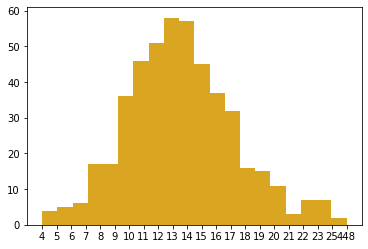

In [18]:
liste_of_occ=Counter(liste_with_all_ingredient_cleaned_)
liste_of_occ=sorted(liste_of_occ.items(), key=lambda t: t[1])
plt.hist(np.array(liste_of_occ)[:,1],20,color = "goldenrod")

<b><p style="color:green;">Etape 2 : On supprime les elements de la poubelle et les elem qui apparaissent moins de 7 fois ( nombre choisi en fonction de l histogramme)</p></b>

In [27]:
#On kik les elem de moins de 7 et les elem de la liste corve
list_elem_to_del=[i[0] for i in liste_of_occ if i[1]<7]+liste_corve
list_elem_to_del=list(set(list_elem_to_del))
#On supprime les elem
df['Ingr']=df['Ingr'].apply(lambda x: ",".join([i for i in x.split(",") if i not in list_elem_to_del]))


In [39]:
print(df.isnull().sum())
print(df.nunique())
print(df.shape)

Marque       0
Ingr         0
Rating       0
Reference    0
dtype: int64
Marque       160
Ingr         506
Rating        29
Reference    505
dtype: int64
(506, 4)


<b><p style="color:blue;font-size:40px;">Encoding 1 HOT </p></b>

In [41]:
df

,Marque,Ingr,Rating,Reference
0,Etat Libre dOrange,"RICINUS COMMUNIS (CASTOR) SEED OIL, STEARETH-...",2.9,Hermann a Mes Cotes Me Paraissait Une Ombre Ea...
1,Ted Lapidus,"DIMETHICONE, CI 42090 (FD&C BLUE NO, BUTYLPHE...",3.6,Oud Blanc Eau de Parfum mixte
2,Lancome,"\nCINNAMAL, SODIUM PHOSPHATE, ALPHA-ISOMETHYL...",3.9,La Nuit Tresor Intense Eau de Parfum pour femme
3,Guess,"ALCOHOL DENAT, TOCOPHEROL,#13380 ALCOHOL, HYD...",5.0,Seductive Noir Eau de Toilette pour femme
4,Pitbull,"CI 42090 (BLUE 1), SODIUM HYALURONATE, PPG-15...",4.9,Pitubull Woman Eau de Parfum pour femme
...,...,...,...,...
501,Kenzo,"PARAFFINUM LIQUIDUM, PEG-90 GLYCERYL ISOSTEAR...",4.0,Flower by Kenzo brume pour cheveux et corps po...
502,Lolita Lempicka,"CI 42090 (BLUE 1),#13877 ALCOHOL, (SD ALCOHOL...",4.5,Lolita Lempicka Mon Premier Parfum Eau de Parf...
503,Salvador Dali,"BUTYROSPERMUM PARKII (SHEA BUTTER), CI 61570 ...",4.0,Sunrise in Cadaques Eau de Toilette pour femme
504,Halloween,"HYDROLYZED CORALLINA OFFICINALIS EXTRACT,DIEN...",4.0,Man Shot Eau de Toilette pour homme
